# Mini Project 4 - MACHINE LEARNING FOR ANALYSIS AND PREDICTION OF ATTRITION
Attrition is the rate at which employees leave their job. When attrition reaches high levels, it becomes a
concern for the company. Therefore, it is important to find out why employees leave, which factors contribute
to such significant decision.

## 1. DATA WRANGLING AND EXPLORATION
- load and explore the data, clean it, and analyse it by statistics
- select the most relevant features of an employee for machine learning operations on prediction of
the attrition

### IMPORTING THE LIBRARIES

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, classification_report

### LOADING THE DATA

In [85]:
# Load the Excel spreadsheet to examine its contents and structure
file_path = './data/WA_Fn-UseC_-HR-Employee-Attrition.xlsx'
employee_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand the data
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### EXPLORING THE DATA
- We'll check for missing values, understand data types, and get a summary of the dataset

In [86]:
# Check for missing values
missing_values = employee_data.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [87]:
# Data types of the columns
data_types = employee_data.dtypes
print(data_types)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [88]:
# Statistical summary of the dataset
statistical_summary = employee_data.describe()
print(statistical_summary)

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [89]:
# Converting Categorical Variables to Numerical Format
le = LabelEncoder()
categorical_columns = employee_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    employee_data[column] = le.fit_transform(employee_data[column])

## 2. Supervised machine learning: classification
- train, test, and validate two machine learning models for classification and prediction of attrition (e.g.
Decision Tree and Naïve Bayes)
- apply appropriate methods and measures for assessing the validity of the models and recommend the
one with highest accuracy

### ANALYZING THE DATA
- Plotting the distribution of Attrition & the correlation matrix as a heatmap

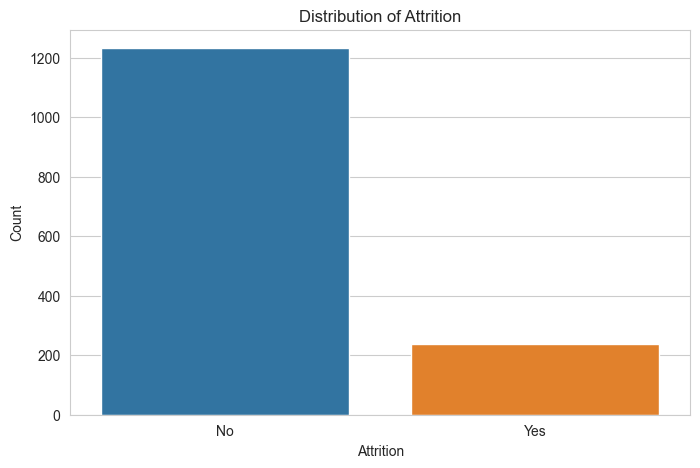

In [90]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=employee_data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

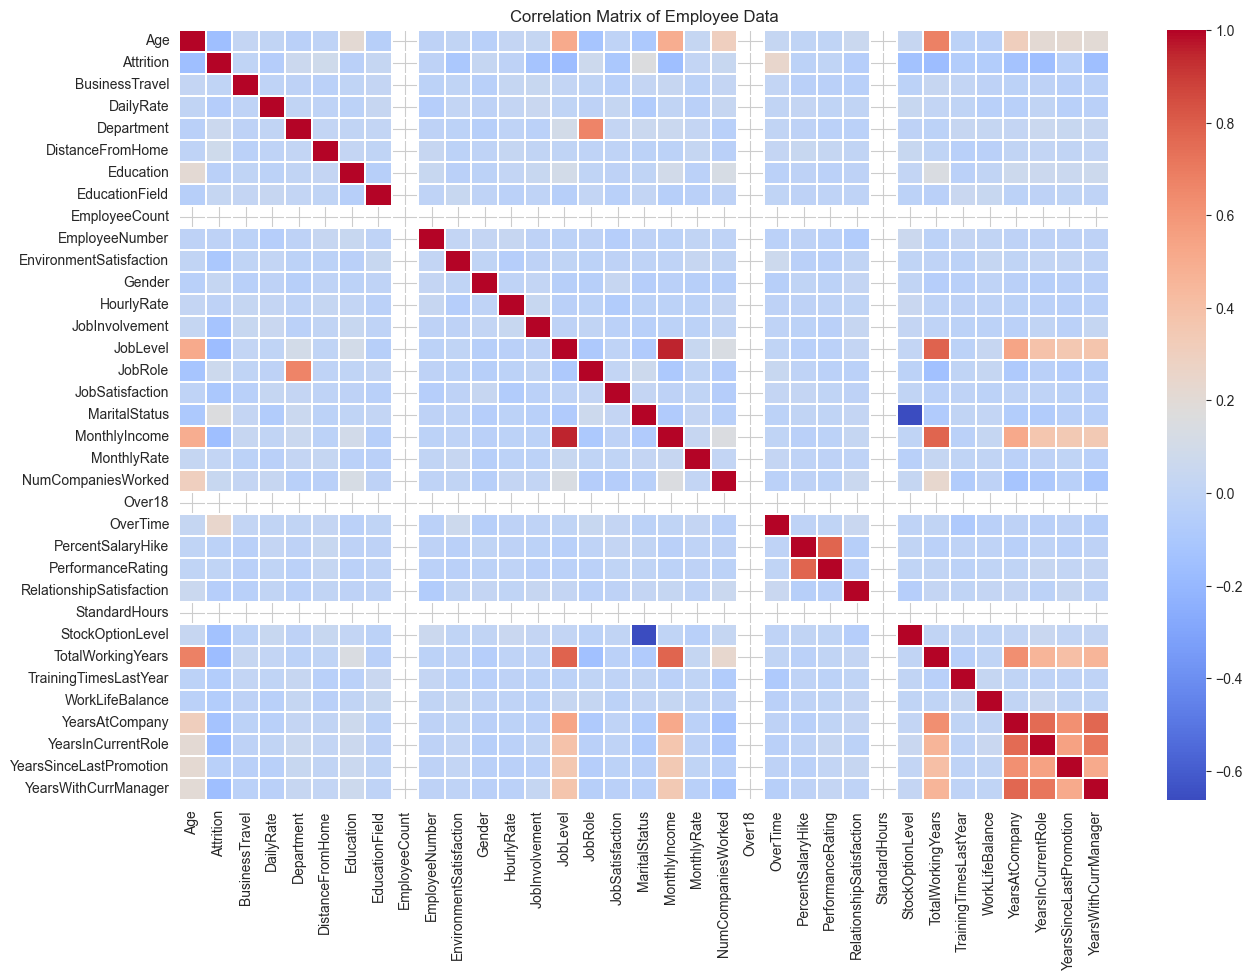

In [91]:
# Computing the correlation matrix
correlation_matrix = employee_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.1, linecolor='white', annot=False)
plt.title('Correlation Matrix of Employee Data')
plt.show()

In [92]:
# Extracting correlations with Attrition specifically and sorting
attrition_correlations = correlation_matrix['Attrition'].sort_values(ascending=False)
print(attrition_correlations)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

###  SPLITTING THE DATA 
- features (X) and the target variable (y), followed by dividing it into training and test sets.

In [93]:
# Defining the features and target variable
X = employee_data.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount'], axis=1)  # Excluding identifiers
y = employee_data['Attrition']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 32), (294, 32), (1176,), (294,))

### TRAINING AND EVALUATING THE TEST SET
-we'll train two models: a Decision Tree and a Naïve Bayes classifier. After training, we'll evaluate their performance on the test set.

In [94]:
# Initializing the models
dt_classifier = DecisionTreeClassifier(random_state=42)
nb_classifier = GaussianNB()

# Training the models
dt_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

# Making predictions on the test set
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Evaluating the models
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
dt_report = classification_report(y_test, dt_predictions)
nb_report = classification_report(y_test, nb_predictions)

print(dt_accuracy)
print(dt_report)
print(nb_accuracy)
print(nb_report)

0.7755102040816326
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.19      0.21      0.20        39

    accuracy                           0.78       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.78      0.78       294

0.8401360544217688
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.42      0.54      0.47        39

    accuracy                           0.84       294
   macro avg       0.67      0.71      0.69       294
weighted avg       0.86      0.84      0.85       294



### Results

The training and testing of the Decision Tree and Naïve Bayes models have yielded the following results:

- Decision Tree Classifier Accuracy: 78%
- Naïve Bayes Classifier Accuracy: 84%

The Naïve Bayes model outperforms the Decision Tree model in terms of accuracy on the test set.

## 3. Unsupervised machine learning: clustering
- apply at least one clustering algorithm (e.g. K-Means) for segmentation of the employees in groups of
similarity
- evaluate the quality of the clustering by calculating a silhouette score and recommend the cluster
configuration with higher score

### FINDING THE OPTIMAL NUMBER OF CLUSTERS

In [95]:
# silhouette score calculation with a range of clusters (2 to 10)
silhouette_scores = []
for k in range(2, 10):  # Testing cluster sizes from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

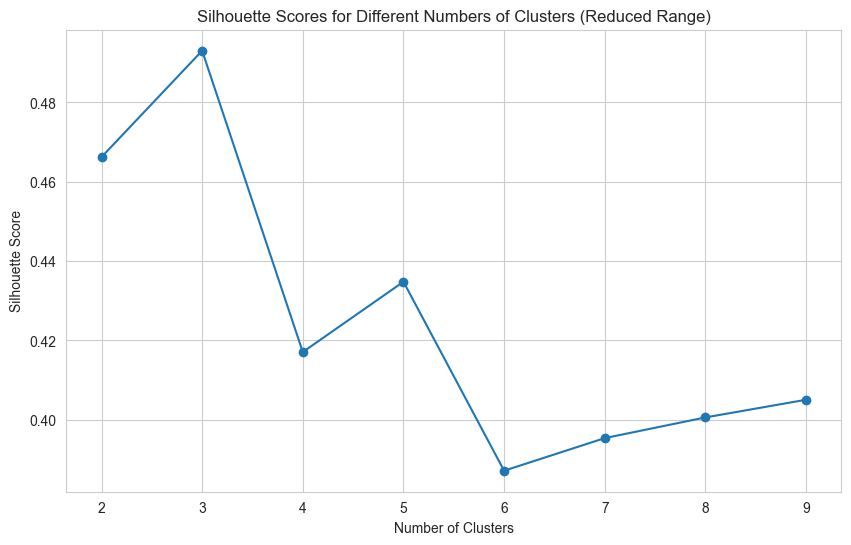

In [96]:

# Plotting the silhouette scores for the reduced range of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [97]:
# The optimal number of clusters and the maximum silhouette score
optimal_clusters = range(2, 10)[silhouette_scores.index(max(silhouette_scores))]
optimal_clusters, max(silhouette_scores)

(3, 0.49301764615400734)

In [98]:
# Applying K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X)
# Getting the cluster labels
cluster_labels = kmeans_optimal.labels_

# Add the cluster labels to the original dataset for further analysis
employee_data['Cluster'] = cluster_labels

c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Salar Salim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


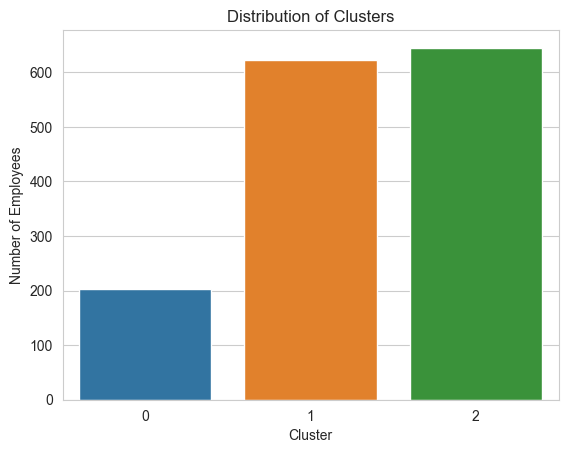

In [99]:
# Visualizing the distribution of clusters
sns.countplot(x='Cluster', data=employee_data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Employees')
plt.show()


In [100]:
# Displaying the distribution of employees in each cluster
cluster_distribution = employee_data['Cluster'].value_counts()

# Analyzing the mean values of features for each cluster
cluster_mean_values = employee_data.groupby('Cluster').mean()

print(cluster_distribution)
print(cluster_mean_values)


Cluster
2    645
1    622
0    203
Name: count, dtype: int64
               Age  Attrition  BusinessTravel   DailyRate  Department  \
Cluster                                                                 
0        46.280788   0.073892        1.640394  811.694581    1.211823   
1        35.678457   0.176849        1.599678  797.212219    1.279743   
2        35.179845   0.173643        1.604651  804.672868    1.257364   

         DistanceFromHome  Education  EducationField  EmployeeCount  \
Cluster                                                               
0                8.738916   3.004926        2.133005            1.0   
1                9.302251   2.850482        2.226688            1.0   
2                9.229457   2.944186        2.303876            1.0   

         EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
Cluster                  ...                                            
0            979.418719  ...                  2.788177           80.0  

### Results
The clustering resulted in three groups of employees with the following distribution:

Cluster 0: 203 employees
Cluster 1: 622 employees
Cluster 2: 645 employees

Cluster 0 has the highest average age (46.3 years) and the highest total working years (~23.6 years), suggesting these might be more experienced employees. They also have the lowest attrition rate (around 7.4%), indicating higher job stability or satisfaction.
Cluster 1 and Cluster 2 have younger employees with an average age of around 35 years and lower total working years (9 to 10 years). They have higher attrition rates compared to Cluster 0, with Cluster 1 at approximately 17.7% and Cluster 2 at around 17.4%.

### STORING THE MODEL

In [101]:
joblib.dump(kmeans_optimal, 'kmmodel.pkl')

['kmmodel.pkl']